# ***Optuna - Final Project - Applied Statistics***

**Omer Shadmi (327722575) & Inbar Fabian (328274212)**


---------------------

## **K-means Clustering**


### <u>Importing the data:</u>

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import optuna

In [35]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
# Display some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
# Preprocess the data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values  # Choose relevant features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <u>Initial K-means clustering:</u>

First, we will apply the initial K-means, with n_clusters of 3.

In [38]:
# Initial K-means clustering
def kmeans_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    return kmeans, labels, silhouette_avg

In [39]:
initial_n_clusters = 3
initial_kmeans, initial_kmeans_labels, initial_kmeans_silhouette = kmeans_clustering(initial_n_clusters)

print(f"Initial Silhouette Score: {initial_kmeans_silhouette:.4f}")

Initial Silhouette Score: 0.4666


Now, we define a function that will plot us the clustering & the silhouette of our clusters. 

In [40]:
def plot_silhouette(X, labels):
    plt.figure(figsize=(12, 4))
    
    # Left subplot: scatter plot of clusters
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", alpha=0.7)
    plt.title("Cluster Visualization")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")

    # Right subplot: silhouette plot
    plt.subplot(1, 2, 2)
    silhouettes = silhouette_samples(X, labels)
    y_lower = 10
    clusters = np.unique(labels)
    
    for idx, label in enumerate(clusters):
        ith_cluster_silhouette_values = silhouettes[labels == label]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(idx) / (clusters.size - 1))
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'{label}')
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("Silhouette for each Cluster")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster label")

    sil_score = silhouettes.mean()
    plt.axvline(x=sil_score, color="red", linestyle="--")

    plt.yticks([])
    plt.xticks([-1, 0, 1, sil_score])
    plt.xlim([-1, 1])
    plt.ylim([0, len(X) + (clusters.size + 1) * 10])
    plt.show()

<u>Plot + Silhouette for the Initial K-means (n_clusters=3):</u>

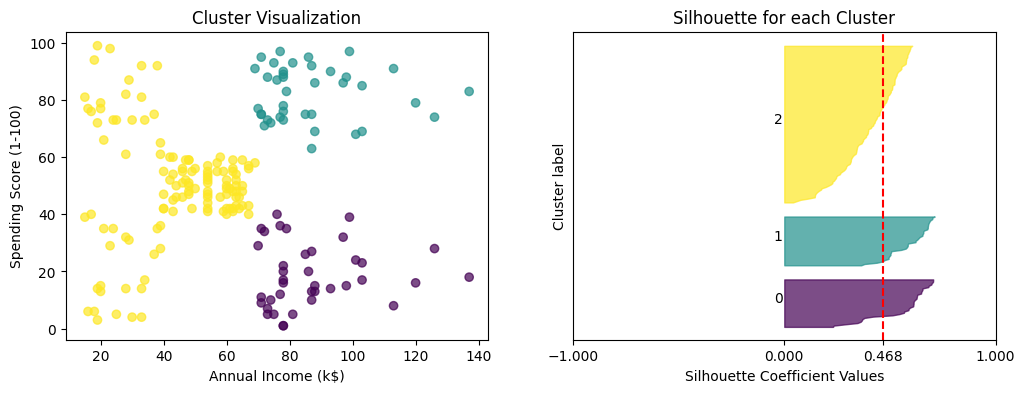

In [41]:
plot_silhouette(X, initial_kmeans_labels)

### <u>Optuna Optimization:</u>

We will now use the Optuna tool in order to optimize the clustering. 

In [42]:
# Define Optuna objective function
def kmeans_objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    return silhouette_avg

And apply the Optuna for 100 trials.

In [43]:
# Optimize using Optuna
kmeans_study = optuna.create_study(direction='maximize')
kmeans_study.optimize(kmeans_objective, n_trials=100)

[I 2024-09-08 18:42:19,781] A new study created in memory with name: no-name-0291e276-d131-4c84-80ed-4367b948f33f
[I 2024-09-08 18:42:19,831] Trial 0 finished with value: 0.5138257534676561 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 0.5138257534676561.
[I 2024-09-08 18:42:19,851] Trial 1 finished with value: 0.4550112502601921 and parameters: {'n_clusters': 8}. Best is trial 0 with value: 0.5138257534676561.
[I 2024-09-08 18:42:19,866] Trial 2 finished with value: 0.4566624374485964 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.5138257534676561.
[I 2024-09-08 18:42:19,882] Trial 3 finished with value: 0.4566624374485964 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.5138257534676561.
[I 2024-09-08 18:42:19,897] Trial 4 finished with value: 0.44475993501732874 and parameters: {'n_clusters': 10}. Best is trial 0 with value: 0.5138257534676561.
[I 2024-09-08 18:42:19,910] Trial 5 finished with value: 0.5546571631111091 and parameter

<u>The optimized results we got are:</u>

In [44]:
print("Best trial:")
kmeans_trial = kmeans_study.best_trial
print(f"  Value: {kmeans_trial.value:.4f}")
print("  Params: ")
for key, value in kmeans_trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value: 0.5547
  Params: 
    n_clusters: 5


We apply this Optuna-optimized K-means.

In [45]:
# Apply optimized K-means
optimized_n_clusters = kmeans_trial.params['n_clusters']
optimized_kmeans, optimized_kmeans_labels, optimized_kmeans_silhouette = kmeans_clustering(optimized_n_clusters)

print(f"Optimized Silhouette Score: {optimized_kmeans_silhouette:.4f}")

Optimized Silhouette Score: 0.5547


<u>Plot + Silhouette for Optimized K-means:</u>

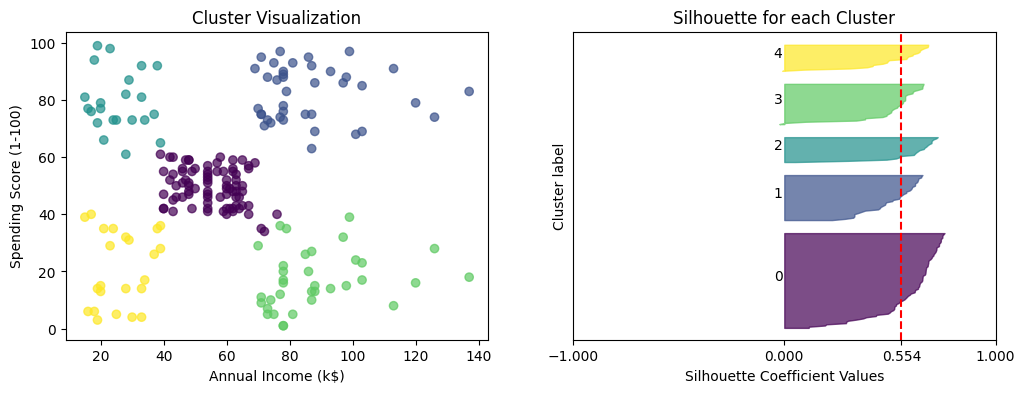

Initial Silhouette Score: 0.4666
Optimized Silhouette Score: 0.5547
Improvement: 18.88%


In [46]:
plot_silhouette(X, optimized_kmeans_labels)

# Compare initial and optimized results
print(f"Initial Silhouette Score: {initial_kmeans_silhouette:.4f}")
print(f"Optimized Silhouette Score: {optimized_kmeans_silhouette:.4f}")
print(f"Improvement: {(optimized_kmeans_silhouette - initial_kmeans_silhouette) / initial_kmeans_silhouette * 100:.2f}%")

### <u>Conclusion:</u> 

A conclusion for our K-means clustering model's optimization process using Optuna.

In [47]:
# Conclusion
print("Conclusion:")
print(f"The initial K-means clustering with {initial_n_clusters} clusters achieved a silhouette score of {initial_kmeans_silhouette:.4f}.")
print(f"After optimization with Optuna, the best number of clusters was found to be {optimized_n_clusters}, achieving a silhouette score of {optimized_kmeans_silhouette:.4f}.")
print(f"This represents an improvement of {(optimized_kmeans_silhouette - initial_kmeans_silhouette) / initial_kmeans_silhouette * 100:.2f}% in the silhouette score.")

Conclusion:
The initial K-means clustering with 3 clusters achieved a silhouette score of 0.4666.
After optimization with Optuna, the best number of clusters was found to be 5, achieving a silhouette score of 0.5547.
This represents an improvement of 18.88% in the silhouette score.


### <u>Visualizations:</u>

Let's visualize some of our results. 

In [48]:
# Import additional visualization libraries
from optuna.visualization import plot_contour
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_parallel_coordinate

In [49]:
# Plot optimization history
history_fig = plot_optimization_history(kmeans_study)
history_fig.show()

This shows the history of the silhouette value over the trials. 

In [50]:
# Plot parallel coordinate plot of the optimization results
parallel_fig = plot_parallel_coordinate(kmeans_study)
parallel_fig.show()

Here we can see the correlations between the different n_clusters values and the silhouette values. 

Now we want to check the 'Inertia' measure which tells us how tightly the clusters are packed in the K-means clustering we got. The smaller the 'Inertia' is - the tighter the clusters are. 

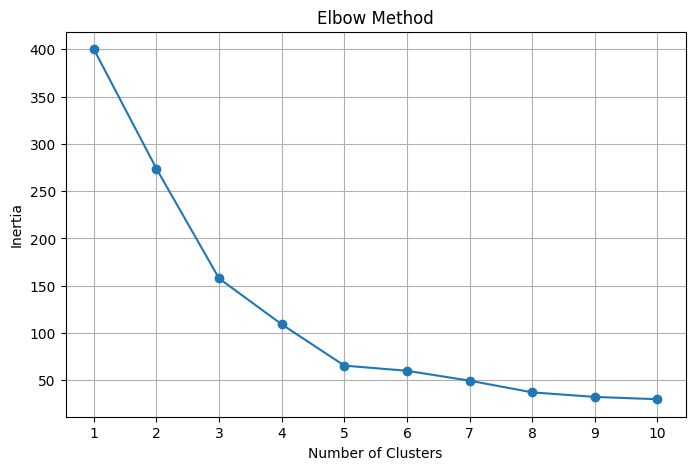

In [51]:
# Elbow method 
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)  # Use the scaled features
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

We can see that the 'Inertia' decrease as the number of clusters increase. 

However, the slope becomes less significant as we pass the number of clusters of 5, another evidence for the optimality of n_clusters=5. 

---------------

## **Gaussian Mixture Model - GMM**

In [52]:
from sklearn.mixture import GaussianMixture

### <u>Initial GMM clustering:</u>

First, we will apply the initial K-means, with n_clusters of 3.

In [53]:
# Initial GMM clustering
def gmm_clustering(n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    return gmm, labels, silhouette_avg

In [54]:
n_components = 3
initial_gmm, initial_gmm_labels, initial_gmm_silhouette = gmm_clustering(n_components)

print(f"Initial Silhouette Score: {initial_gmm_silhouette:.4f}")

Initial Silhouette Score: 0.4302


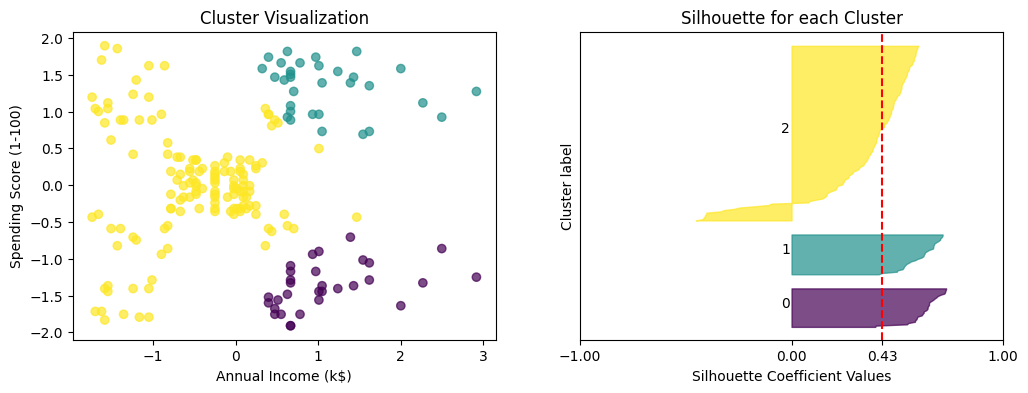

In [55]:
plot_silhouette(X_scaled, initial_gmm_labels)

### <u>Optuna Optimization:</u>

We will now use the Optuna tool in order to optimize the GMM-clustering.

In [56]:
# Define Optuna objective function for GMM
def gmm_objective(trial):
    n_components = trial.suggest_int('n_components', 2, 10)
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    return silhouette_avg

In [57]:
# Optimize using Optuna
study_gmm = optuna.create_study(direction='maximize')
study_gmm.optimize(gmm_objective, n_trials=100)

[I 2024-09-08 18:42:26,938] A new study created in memory with name: no-name-652fffb9-eda1-4a2f-87fa-4bb04d269b74


[I 2024-09-08 18:42:27,242] Trial 0 finished with value: 0.4232815191607955 and parameters: {'n_components': 9}. Best is trial 0 with value: 0.4232815191607955.
[I 2024-09-08 18:42:27,265] Trial 1 finished with value: 0.37908245581738753 and parameters: {'n_components': 2}. Best is trial 0 with value: 0.4232815191607955.
[I 2024-09-08 18:42:27,290] Trial 2 finished with value: 0.5536892843811245 and parameters: {'n_components': 5}. Best is trial 2 with value: 0.5536892843811245.
[I 2024-09-08 18:42:27,322] Trial 3 finished with value: 0.41339168343976207 and parameters: {'n_components': 4}. Best is trial 2 with value: 0.5536892843811245.
[I 2024-09-08 18:42:27,530] Trial 4 finished with value: 0.5090572558079016 and parameters: {'n_components': 7}. Best is trial 2 with value: 0.5536892843811245.
[I 2024-09-08 18:42:27,699] Trial 5 finished with value: 0.37908245581738753 and parameters: {'n_components': 2}. Best is trial 2 with value: 0.5536892843811245.
[I 2024-09-08 18:42:28,039] Tri

<u>The optimized GMM results we got are:</u>

In [58]:
print("Best trial:")
trial_gmm = study_gmm.best_trial
print(f"  Value: {trial_gmm.value:.4f}")
print("  Params: ")
for key, value in trial_gmm.params.items():
    print(f"    {key}: {value}")


Best trial:
  Value: 0.5537
  Params: 
    n_components: 5


We apply this Optuna-optimized GMM.

<u>Plot + Silhouette for Optimized GMM:</u>

Optimized Silhouette Score: 0.5537


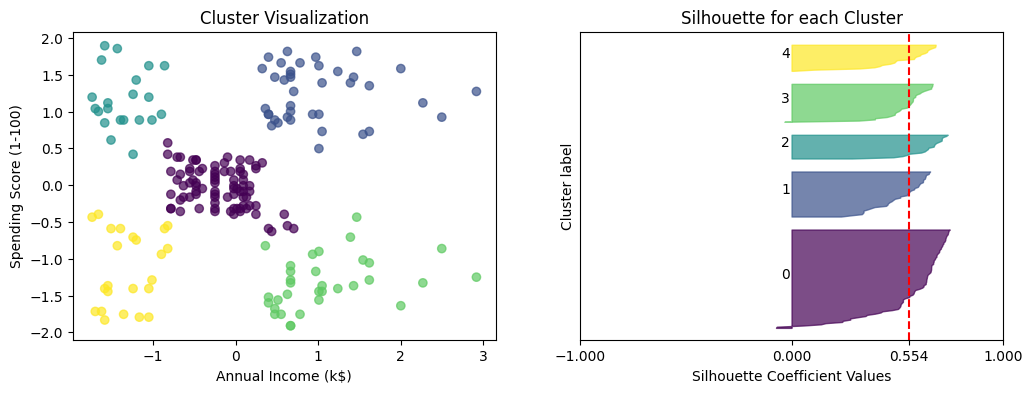

Initial Silhouette Score: 0.4302
Optimized Silhouette Score: 0.5537
Improvement: 28.71%


In [59]:
# Apply optimized GMM
optimized_n_components = trial_gmm.params['n_components']
optimized_gmm, optimized_labels_gmm, optimized_silhouette_gmm = gmm_clustering(optimized_n_components)

print(f"Optimized Silhouette Score: {optimized_silhouette_gmm:.4f}")
plot_silhouette(X_scaled, optimized_labels_gmm)

# Compare initial and optimized results
print(f"Initial Silhouette Score: {initial_gmm_silhouette:.4f}")
print(f"Optimized Silhouette Score: {optimized_silhouette_gmm:.4f}")
print(f"Improvement: {(optimized_silhouette_gmm - initial_gmm_silhouette) / initial_gmm_silhouette * 100:.2f}%")

### <u>Conclusion:</u> 

A conclusion for our GMM's optimization process using Optuna.

In [60]:
# Conclusion
print("Conclusion:")
print(f"The initial Gaussian Mixture Model with {n_components} components achieved a silhouette score of {initial_gmm_silhouette:.4f}.")
print(f"After optimization with Optuna, the best number of components was found to be {optimized_n_components}, achieving a silhouette score of {optimized_silhouette_gmm:.4f}.")
print(f"This represents an improvement of {(optimized_silhouette_gmm - initial_gmm_silhouette) / initial_gmm_silhouette * 100:.2f}% in the silhouette score.")

Conclusion:
The initial Gaussian Mixture Model with 3 components achieved a silhouette score of 0.4302.
After optimization with Optuna, the best number of components was found to be 5, achieving a silhouette score of 0.5537.
This represents an improvement of 28.71% in the silhouette score.


### <u>Visualizations:</u>

Let's visualize for the GMM.

In [61]:
# Plot optimization history
history_fig = plot_optimization_history(study_gmm)
history_fig.show()

This shows the history of the silhouette value over the trials.  

In [62]:
# Plot parallel coordinate plot of the optimization results
parallel_fig = plot_parallel_coordinate(study_gmm)
parallel_fig.show()

Here we can see the correlations between the different n_components values and the silhouette values. 

Now we want to check another measure for the performence of the clustering. 

This time, we will use log-likelihood which indicates the fit of the model to the data. The higher the log-likelihood - the better the fit.

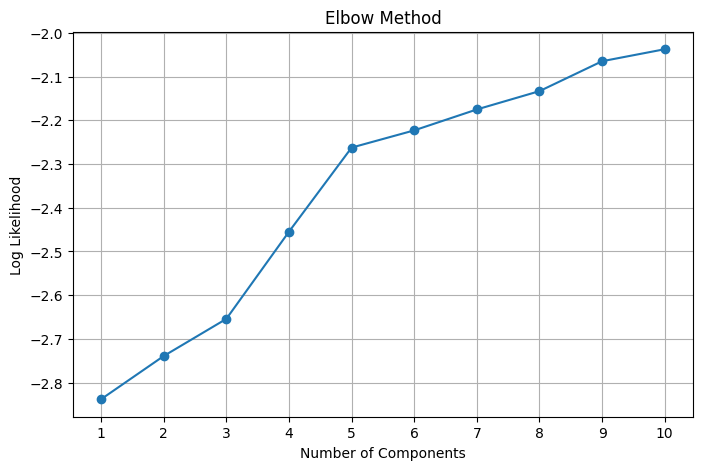

In [63]:
# Elbow method 
log_likelihoods = [] 

for i in range(1, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    gmm.fit(X_scaled)  
    log_likelihoods.append(gmm.score(X_scaled))  

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), log_likelihoods, marker='o')  
plt.title('Elbow Method')
plt.xlabel('Number of Components')  
plt.ylabel('Log Likelihood')  
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Here we can see that the log-likelihood increase as the number of components increase. 

However, the slope becomes less significant as we pass the n_components=5, another indicator for the optimality of 5 clusters for GMM. 

--------------

### <u>Final Summary:</u> 

<u>The final sammary for both models:</u>

In [64]:
print("Final Conclusion:")
print(f"For the KMeans model, the initial silhouette score was {initial_kmeans_silhouette:.4f}, the final silhouette score was {optimized_kmeans_silhouette:.4f}, and the improvement was {(optimized_kmeans_silhouette - initial_kmeans_silhouette) / initial_kmeans_silhouette * 100:.2f}%.")
print(f"For the GMM model, the initial silhouette score was {initial_gmm_silhouette:.4f}, the final silhouette score was {optimized_silhouette_gmm:.4f}, and the improvement was {(optimized_silhouette_gmm - initial_gmm_silhouette) / initial_gmm_silhouette * 100:.2f}%.")

Final Conclusion:
For the KMeans model, the initial silhouette score was 0.4666, the final silhouette score was 0.5547, and the improvement was 18.88%.
For the GMM model, the initial silhouette score was 0.4302, the final silhouette score was 0.5537, and the improvement was 28.71%.


**The End!**

--------